In [1]:
age = 42

In [2]:
height = 165.1

In [3]:
microbe = "infantis"

In [4]:
is_ready = False

In [7]:
print(age)
print(height)
print(microbe)
print(is_ready)

42
165.1
infantis
False


In [9]:
favorite_microbes=["Bifidobacterium","Lactobacillus","Streptococcus"]
for favorite_microbe in favorite_microbes:
    print("One of my favorite microbes is:", favorite_microbe) 

One of my favorite microbes is: Bifidobacterium
One of my favorite microbes is: Lactobacillus
One of my favorite microbes is: Streptococcus


In [13]:
microbes=["Bifidobacterium","E. coli","Lactobacillus","Salmonella"]
for microbe in microbes:
    if microbe == "Bifidobacterium":
        print("Beneficial microbe:",microbe)
    elif microbe == "Lactobacillus":
        print("Beneficial microbe:",microbe)
    else: 
        print("Potentially harmful microbe:",microbe)

Beneficial microbe: Bifidobacterium
Potentially harmful microbe: E. coli
Beneficial microbe: Lactobacillus
Potentially harmful microbe: Salmonella


In [15]:
microbes=["Bifidobacterium","E. coli","Lactobacillus","Salmonella"]
for microbe in microbes:
    if microbe in ["Bifidobacterium","Lactobacillus"]:
        print("Beneficial microbe:",microbe)
    else:
        print("Potential pathogen detected:",microbe)

Beneficial microbe: Bifidobacterium
Potential pathogen detected: E. coli
Beneficial microbe: Lactobacillus
Potential pathogen detected: Salmonella


In [18]:
def classify_microbe(microbe_name):
    if microbe_name in ["Salmonella","E. Coli"]:
        print("Pathogen")
    else:
        print("Beneficial")
classify_microbe("Lactobacillus")
classify_microbe("Salmonella")

Beneficial
Pathogen


In [1]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

In [21]:
sequence=Seq("ATGCTAGCGTACGTAGCTAGCGTACG")
gc=gc_fraction(sequence)*100
print(f"GC-content: {gc:.2f}%")

GC-content: 53.85%


In [22]:
motif="CGTA"
positions = []
start = 0
while True:
    position=sequence.find(motif,start)
    if position ==-1:
        break
    positions.append(position)
    start = position + 1
print(f"Motif '{motif}' found at position {positions}")


Motif 'CGTA' found at position [7, 11, 20]


In [28]:
with open("bio_pipeline.fasta","w") as file:
    file.write(">seq1\nATGCGCGATCGATCGTAGC\n")
    file.write(">seq2\nGCGCGATATCGATAGCGCGC\n")
    file.write(">seq3\nATATATGCGCGATCGATAT\n")

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
motif="GATC"

for record in SeqIO.parse("bio_pipeline.fasta","fasta"):
    sequence = record.seq
    gc_content = gc_fraction(sequence)*100

    positions = []
    start = 0
    while True:
        position = sequence.find(motif,start)
        if position == -1:
            break
        positions.append(position)
        start = position +1

    print(f"Sequence ID: {record.id}")
    print(f"GC-content: {gc_content:.2f}%")
    if positions:
        print(f"Motif '{motif}' found at positions: {positions}")
    else:
        print(f"Motif '{motif}' not found.")
    print("-"*30)

Sequence ID: seq1
GC-content: 57.89%
Motif 'GATC' found at positions: [6, 10]
Sequence ID: seq2
GC-content: 65.00%
Motif 'GATC' not found.
Sequence ID: seq3
GC-content: 36.84%
Motif 'GATC' found at positions: [10]


In [29]:
with open("microbial_sequence.fasta","w") as file:
    file.write(">microbeA\nATGCTAGCATCGATGCGATG\n")
    file.write(">microbeB\nGCGCGATATCGATCGCGCGA\n")
    file.write(">microbeC\nATATATGCGCGATCGATATG\n")

In [31]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

motif = "ATCG"

sequence_data = []

for record in SeqIO.parse("microbial_sequence.fasta","fasta"):
    sequence = record.seq
    gc_content = gc_fraction(sequence) * 100
    motif_count = sequence.count(motif)

    sequence_data.append({ "Sequence ID": record.id, "Length": len(sequence), "GC-content": round(gc_content, 2), "Motif count": motif_count})

df = pd.DataFrame(sequence_data)
print(df)

  Sequence ID  Length  GC-content  Motif count
0    microbeA      20        50.0            1
1    microbeB      20        65.0            2
2    microbeC      20        40.0            1


In [38]:
def motif_analysis_pipeline(input_fasta, motif, output_csv):
    sequence_data  = []

    for record in SeqIO.parse(input_fasta, "fasta"):
        sequence = record.seq
        gc_content = gc_fraction(sequence) * 100
        motif_count = sequence.count(motif)

        sequence_data.append({"Sequence ID": record.id, "Length": len(sequence), "GC-content": round(gc_content, 2), "Motif count": motif_count})

    df = pd.DataFrame(sequence_data)

    df.to_csv(output_csv, index=False)

    print(df)
    
motif_analysis_pipeline("bio_pipeline.fasta", "CGTA", "motif_analysis_results.csv")



  Sequence ID  Length  GC-content  Motif count
0        seq1      19       57.89            1
1        seq2      20       65.00            0
2        seq3      19       36.84            0


In [1]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


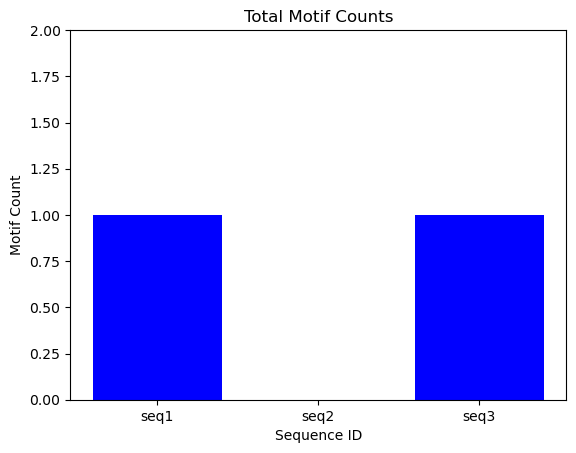

In [5]:
sequence_ids = ['seq1', 'seq2', 'seq3']
motif_count = [1,0,1]

plt.bar(sequence_ids, motif_count, color ='blue')

plt.title('Total Motif Counts')
plt.xlabel('Sequence ID')
plt.ylabel('Motif Count')
plt.ylim(0,2)
plt.show()

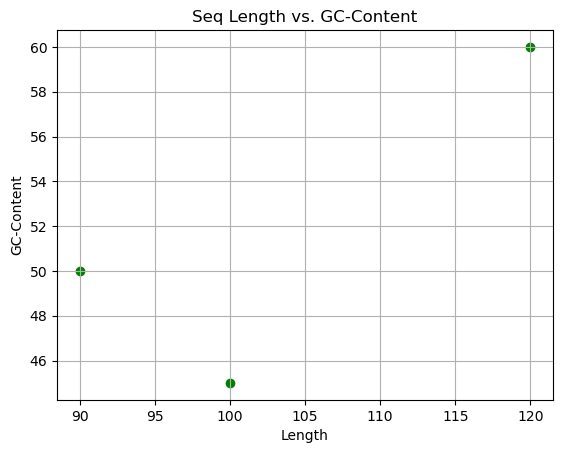

In [14]:
import matplotlib.pyplot as plt
length = [100, 120, 90]
GC_content = [45.0, 60.0, 50.0]
plt.scatter(length, GC_content, color = 'green')
plt.title('Seq Length vs. GC-Content')
plt.xlabel('Length')
plt.ylabel('GC-Content')
plt.grid()
plt.show()

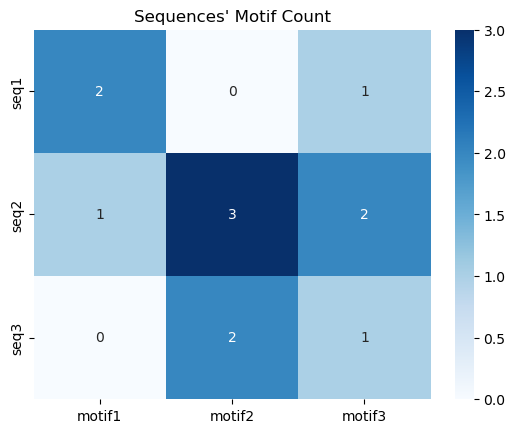

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {"motif1": [2, 1, 0], "motif2": [0, 3, 2], "motif3": [1, 2, 1]}
sequences = ["seq1", "seq2", "seq3"]
df = pd.DataFrame(data, index=sequences)

sns.heatmap(df, cmap='Blues', annot=True)

plt.title("Sequences' Motif Count")

plt.show()